<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M2L1_Introduction_to_Mobile_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Mobile Development

[PPT M2L1 ENG](https://docs.google.com/presentation/d/1rXyS2_2coXlamPRmdzU2UlUeTNERi8MElMz5W6_pVfQ/edit?usp=sharing)

# New topic: Kivy Library


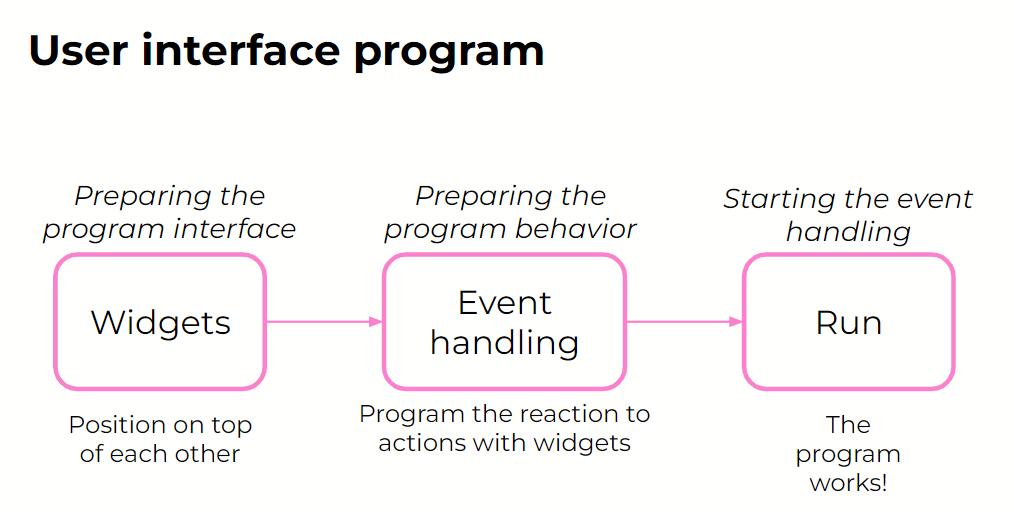

## Running the Program

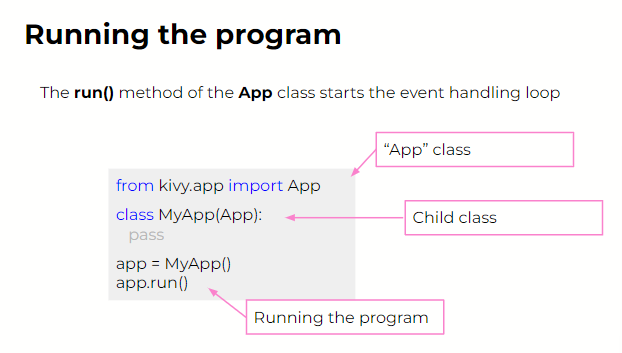

In [ ]:
'''
Try this on VSCode!
'''

from kivy.app import App
class MyApp(App):
   pass

app = MyApp()
app.run()


## Widget

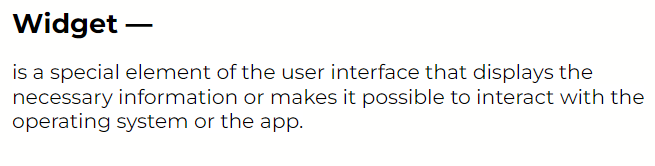

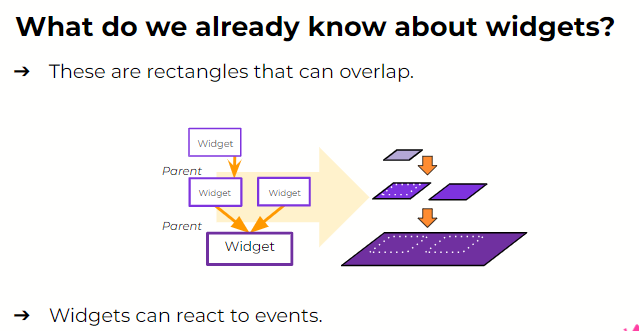

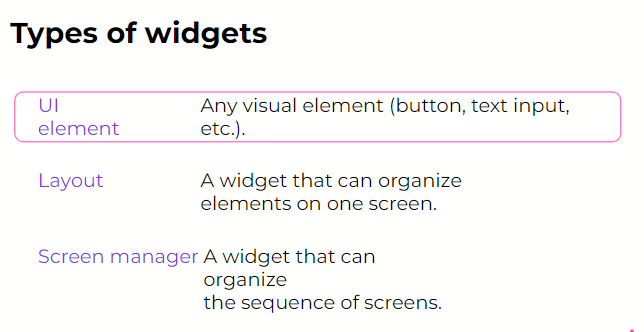

### UI Elements

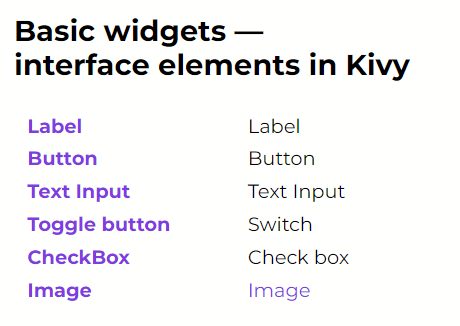

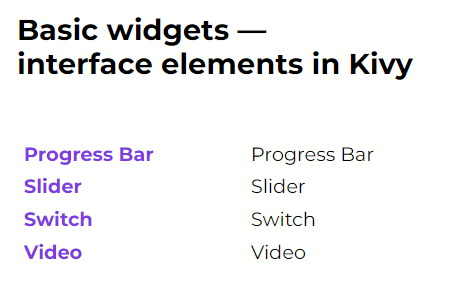

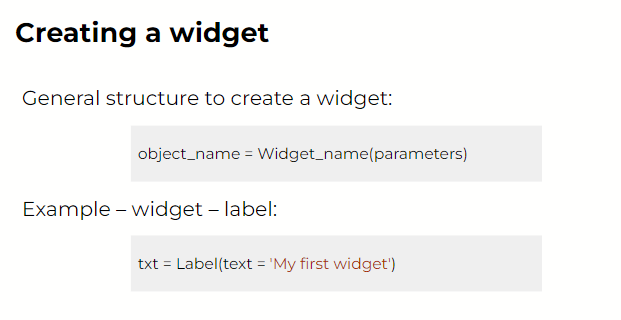

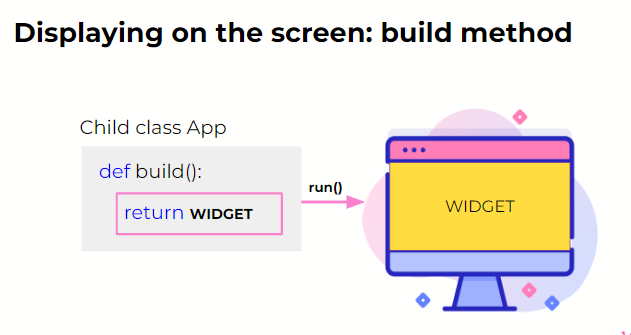

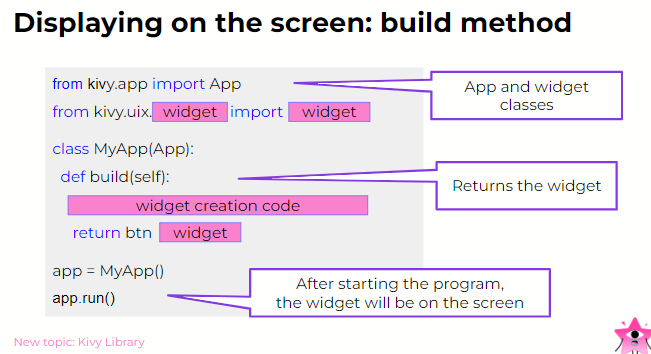

In [ ]:
'''
Try this on VSCode!
'''

# application with one widget.

from kivy.app import App
# all widgets are in separate modules inside kivy.uix:
from kivy.uix.button import Button # button

class MyApp(App):
   # if the App class object has a build() method,
   # then run() will execute this method
   # and will display what "build" returns
   def build(self):
      btn = Button(text='This is a button')
      return btn # always returns a widget!

app = MyApp()
app.run() # the widget of the Button class will be shown

### Layouts

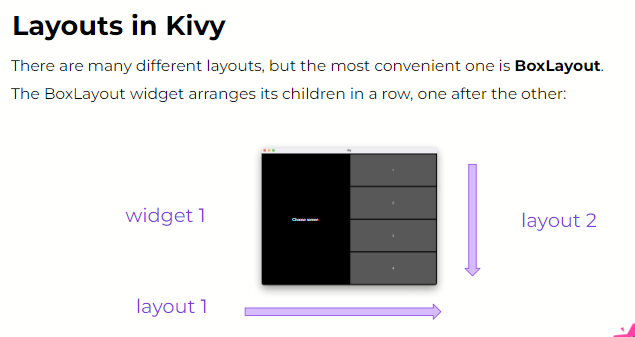

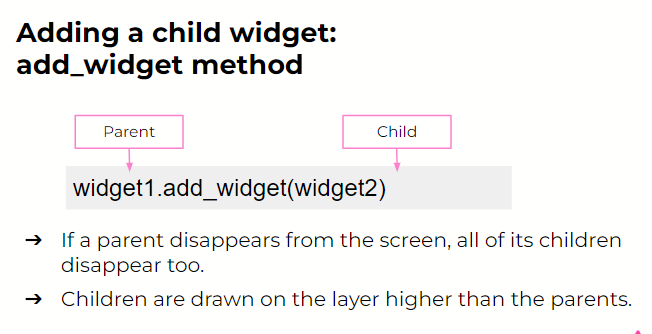

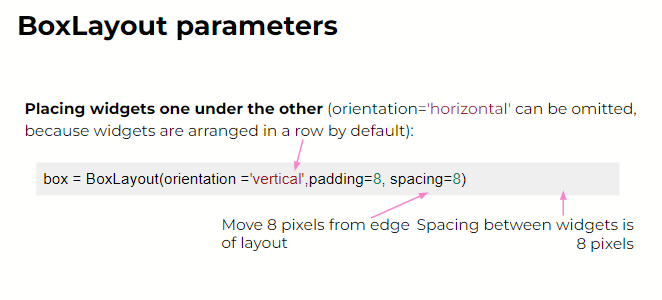

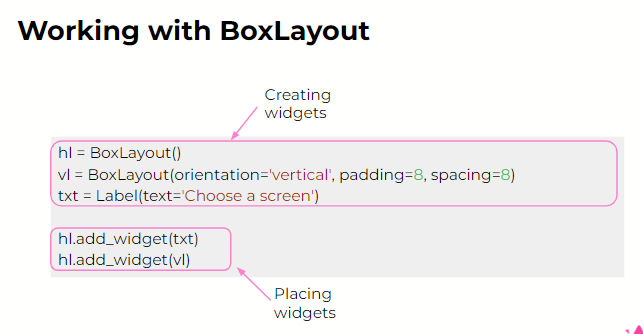

In [ ]:
'''
Try this on VSCode!
'''

from kivy.app import App
from kivy.uix.button import Button # button
from kivy.uix.label import Label # label
from kivy.uix.boxlayout import BoxLayout # layout (it's a widget too!)

class MyApp(App):
   def build(self):
      # when creating a widget, you can set the values of its properties.
      # Widget constructors only accept named parameters!
      txt = Label(text='This is a label')
      btn = Button(text='This is a button')
      layout = BoxLayout()
      layout.add_widget(txt)
      layout.add_widget(btn)
      return layout # returns a widget that
                    # controls the layout of its children - buttons and labels

MyApp().run()

### Event Handling

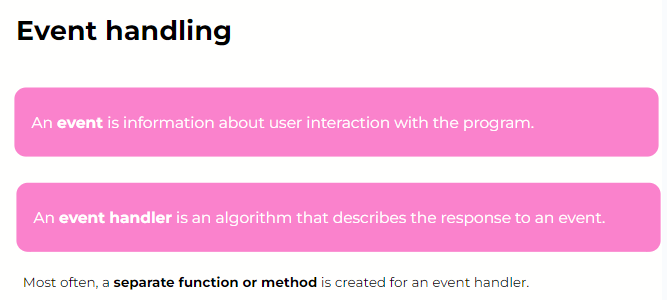

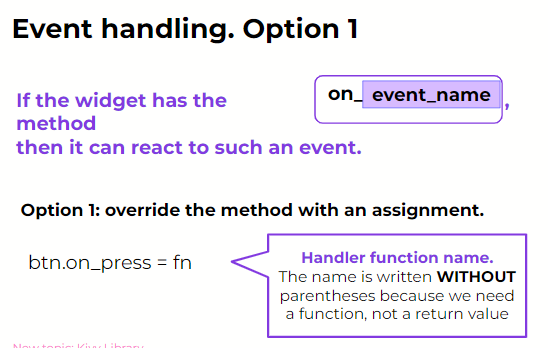

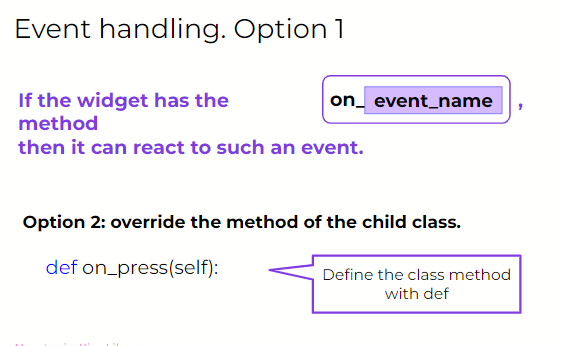

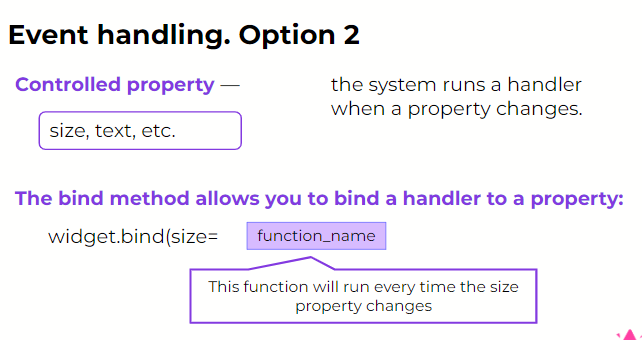

In [ ]:
'''
Try this on VSCode!
'''

# event handling "clicked on the button"

from kivy.app import App
from kivy.uix.button import Button
from kivy.uix.label import Label
from kivy.uix.boxlayout import BoxLayout

def tst():
    print('HELLO!')

class MyApp(App):
    def build(self):
        txt = Label(text='This is a label')
        btn = Button(text='This is a button')
        btn.on_press = tst # the on_press method of the btn object becomes equal to the tst function
                           # that is, calling btn.on_press() is equivalent to calling tst()
                           # a method named on_press is called automatically when the button is clicked

        layout = BoxLayout()
        layout.add_widget(txt)
        layout.add_widget(btn)
        return layout

MyApp().run() # the program monitors the click on the button and prints the text

### Screen Manager

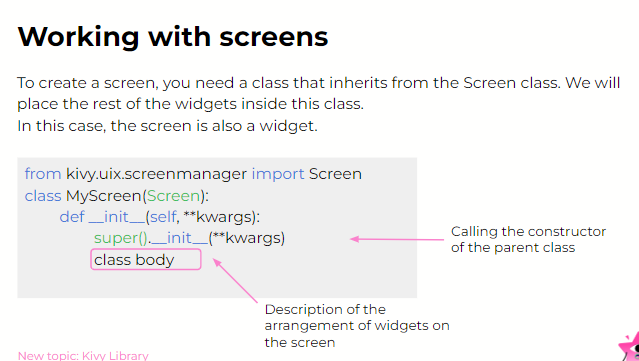

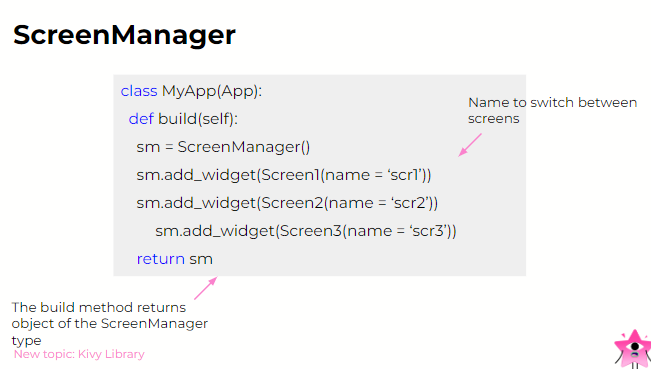

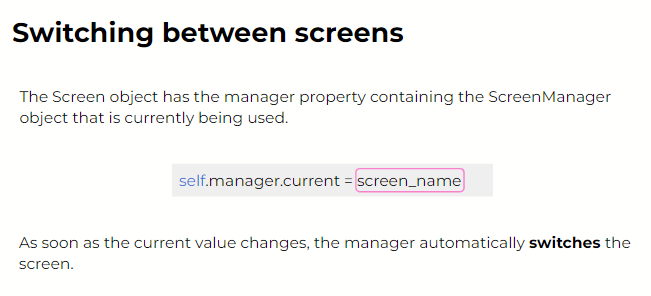

In [ ]:
'''
Try this on VSCode!
'''

# dual screen program
from kivy.app import App
from kivy.uix.button import Button
from kivy.uix.label import Label
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.screenmanager import ScreenManager, Screen
# A screen (an object of the Screen class) is a layout widget (Screen is a descendant of the RelativeLayout class).
# ScreenManager is a special widget that makes one of the screens specified in it visible.

class FirstScr(Screen):
    def __init__(self, name='first'):
        super().__init__(name=name) # the name of the screen must be passed to the constructor of the Screen class
        btn = Button(text="Switch to another screen")
        btn.on_press = self.next
        self.add_widget(btn) # screen is a widget on which all others (descendants) can be created

    def next(self):
        self.manager.transition.direction = 'left' # the Screen object has a "manager" property
                                                   # - is a link to the parent
        self.manager.current = 'second'

class SecondScr(Screen):
    def __init__(self, name='second'):
        super().__init__(name=name)
        btn = Button(text="Come back, come back!")
        btn.on_press = self.next
        self.add_widget(btn)

    def next(self):
        self.manager.transition.direction = 'right'
        self.manager.current = 'first'

class MyApp(App):
    def build(self):
        sm = ScreenManager()
        sm.add_widget(FirstScr())
        sm.add_widget(SecondScr())
        # FirstScr will be shown because it was added first. This can be changed like this:
        # sm.current = 'second'
        return sm

app = MyApp()
app.run()

In [ ]:
from kivy.app import App
from kivy.uix.screenmanager import Screen, ScreenManager
from kivy.uix.label import Label
from kivy.uix.button import Button
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.textinput import TextInput

class ScreenButton(Button):
    def __init__(self, screen, direction='right', goal='main', **kwargs):
        super().__init__(**kwargs)
        self.screen = screen
        self.direction = direction
        self.goal = goal

    def on_press(self):
        self.screen.manager.transition.direction = self.direction
        self.screen.manager.current = self.goal

class MainScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        txt = Label(text='Choose screen')
        btn1 = ScreenButton(self, direction='up', goal='first', text='1')
        btn2 = ScreenButton(self, goal='second', text='2')
        btn3 = ScreenButton(self, goal='third', text='3')
        btn4 = ScreenButton(self, goal='fourth', text='4')

        h_layout = BoxLayout()
        v_layout = BoxLayout(orientation='vertical', padding=8, spacing=8)

        v_layout.add_widget(btn1)
        v_layout.add_widget(btn2)
        v_layout.add_widget(btn3)
        v_layout.add_widget(btn4)

        h_layout.add_widget(txt)
        h_layout.add_widget(v_layout)

        self.add_widget(h_layout)

class FirstScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        v_layout = BoxLayout(orientation='vertical', size_hint=(.5, .5), pos_hint={'center_y':0.5, 'center_x':0.5})

        btn = Button(text='Choice: 1', size_hint=(.5, 1))
        btn_back = ScreenButton(self, goal='main', text='Back')

        v_layout.add_widget(btn)
        v_layout.add_widget(btn_back)

        self.add_widget(v_layout)

class SecondScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.txt = Label(text='Choice: 2')
        txt_pass = Label(text='Enter password:')
        self.txt_input = TextInput()

        btn_ok = Button(text='ok')
        btn_back = ScreenButton(self, text='Back')

        btn_ok.on_press = self.change_text

        h_layout1 = BoxLayout()
        h_layout2 = BoxLayout()
        v_layout = BoxLayout(orientation='vertical')

        h_layout1.add_widget(txt_pass)
        h_layout1.add_widget(self.txt_input)

        h_layout2.add_widget(btn_ok)
        h_layout2.add_widget(btn_back)

        v_layout.add_widget(self.txt)
        v_layout.add_widget(h_layout1)
        v_layout.add_widget(h_layout2)
        self.add_widget(v_layout)

    def change_text(self):
        self.txt.text = self.txt_input.text

class ThirdScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

class FourthScreen(Screen):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

class MyApp(App):
    def build(self):
        sm = ScreenManager()
        sm.add_widget(MainScreen(name='main'))
        sm.add_widget(FirstScreen(name='first'))
        sm.add_widget(SecondScreen(name='second'))
        sm.add_widget(ThirdScreen(name='third'))
        sm.add_widget(FourthScreen(name='fourth'))

        return sm

MyApp().run()

# Solutions

In [ ]:
from kivy.app import App
from kivy.uix.label import Label
from kivy.uix.button import Button
from kivy.uix.textinput import TextInput
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.uix.scrollview import ScrollView

class ScrButton(Button):
  def __init__(self, screen, direction='right', goal='main', **kwargs):
      super().__init__(**kwargs)
      self.screen = screen
      self.direction = direction
      self.goal = goal
  def on_press(self):
      self.screen.manager.transition.direction = self.direction
      self.screen.manager.current = self.goal

class MainScr(Screen):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      vl = BoxLayout(orientation='vertical', padding=8, spacing=8)
      hl = BoxLayout()
      txt = Label(text= 'Choose a screen')

      vl.add_widget(ScrButton(self, direction='down', goal='first', text="1"))
      vl.add_widget(ScrButton(self, direction='left', goal='second', text="2"))
      vl.add_widget(ScrButton(self, direction='up', goal='third', text="3"))
      vl.add_widget(ScrButton(self, direction='right', goal='fourth', text="4"))

      hl.add_widget(txt)
      hl.add_widget(vl)

      self.add_widget(hl)

class FirstScr(Screen):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      vl = BoxLayout(orientation='vertical', size_hint=(.5, .5), pos_hint={'center_x': 0.5, 'center_y': 0.5})
      btn = Button(text= 'Choice: 1', size_hint=(.5, 1), pos_hint={'left': 0})
      btn_back = ScrButton(self, direction='up', goal='main', text="Back", size_hint=(.5, 1), pos_hint={'right': 1})
      vl.add_widget(btn)
      vl.add_widget(btn_back)
      self.add_widget(vl)

class SecondScr(Screen):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      vl = BoxLayout(orientation='vertical')
      self.txt = Label(text= 'Choice: 2')
      vl.add_widget(self.txt)

      hl_0 = BoxLayout(size_hint=(0.8, None), height='30sp')
      lbl1 = Label(text='Enter password:', halign='right')
      self.input = TextInput(multiline=False)


      hl_0.add_widget(lbl1)
      hl_0.add_widget(self.input)
      vl.add_widget(hl_0)

      hl = BoxLayout(size_hint=(0.5, 0.2), pos_hint={'center_x': 0.5})
      btn_false = Button(text="OK!")
      btn_back = ScrButton(self, direction='right', goal='main', text="Back")


      hl.add_widget(btn_false)
      hl.add_widget(btn_back)
      vl.add_widget(hl)
      self.add_widget(vl)
      btn_false.on_press = self.change_text

  def change_text(self):
      self.txt.text = self.input.text + "? Didn't work ..."

class ThirdScr(Screen):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      layout = BoxLayout(orientation='vertical')

      btn_back = ScrButton(self, direction='down', goal='main', text="Back", size_hint=(1, None), height='40sp')
      test_label = Label(text = "Your own screen")

      layout.add_widget(test_label)
      layout.add_widget(btn_back)

      self.add_widget(layout)


class FourthScr(Screen):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      vl = BoxLayout(orientation='vertical', spacing=8)
      a = 'START ' + 'Choice: 3 ' * 200
      test_label = Label(text = "Extra exercise",size_hint=(0.3,None))


      btn_back = ScrButton(self, direction='left', goal='main', text="Back", size_hint=(1, .2), pos_hint={'center-x': 0.5})
      self.label = Label(text=a, size_hint_y=None, font_size='24sp', halign='left', valign='top')
      self.label.bind(size=self.resize)
      self.scroll = ScrollView(size_hint=(1, 1))
      self.scroll.add_widget(self.label)


      vl.add_widget(test_label)
      vl.add_widget(btn_back)
      vl.add_widget(self.scroll)
      self.add_widget(vl)

  def resize(self, *args):
      self.label.text_size = (self.label.width, None)
      self.label.texture_update()
      self.label.height = self.label.texture_size[1]


class MyApp(App):
  def build(self):
      sm = ScreenManager()
      sm.add_widget(MainScr(name='main'))
      sm.add_widget(FirstScr(name='first'))
      sm.add_widget(SecondScr(name='second'))
      sm.add_widget(ThirdScr(name='third'))
      sm.add_widget(FourthScr(name='fourth'))
      return sm

MyApp().run()
